In [1]:
from scipy import stats 
import numpy as np
import pandas as pd

from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import seaborn               as     sns
import matplotlib.pyplot     as     plt
import math

%matplotlib inline

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


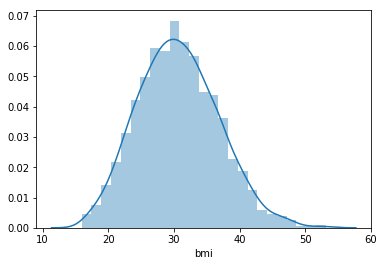

In [7]:
## BMI
sns.distplot(df.bmi)


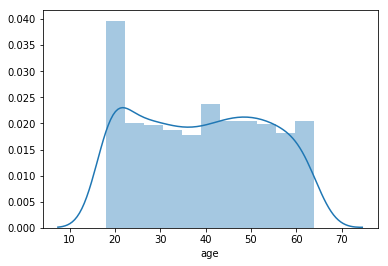

In [8]:
## AGE
sns.distplot(df.age)

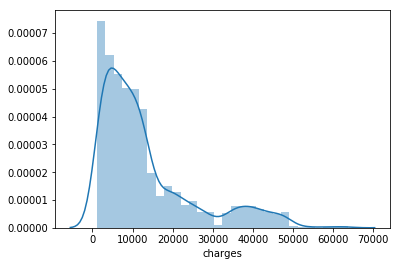

In [9]:
## Charges
sns.distplot(df.charges)

In [10]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

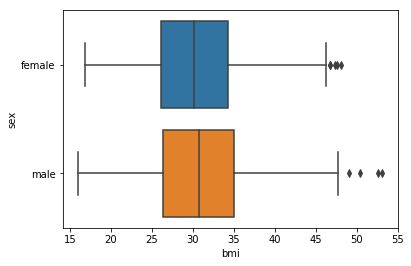

In [11]:
#****************BMI**************************
sns.boxplot(x='bmi',y='sex',data=df)        

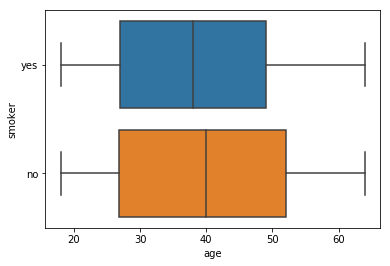

In [12]:
#AGE
sns.boxplot(x='age',y='smoker',data=df)

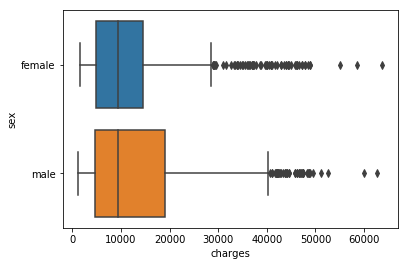

In [13]:
#Charges
sns.boxplot(x='charges',y='sex',data=df)

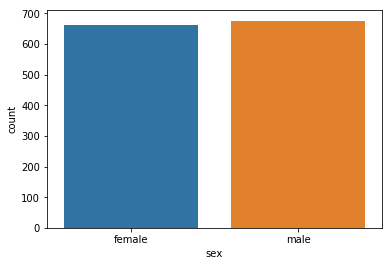

In [14]:
#Gender
sns.countplot(df.sex,data=df)


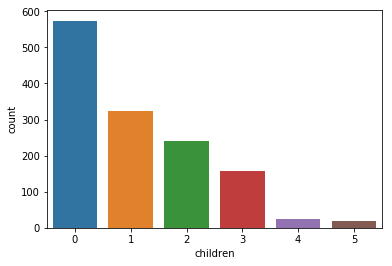

In [15]:
#Children
sns.countplot(df.children,data=df)

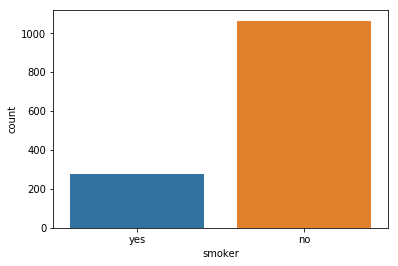

In [16]:
#Smokers
sns.countplot(df.smoker,data=df)

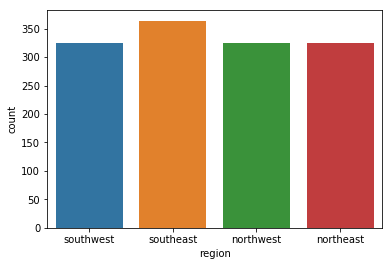

In [17]:
#Region
sns.countplot(df.region,data=df)

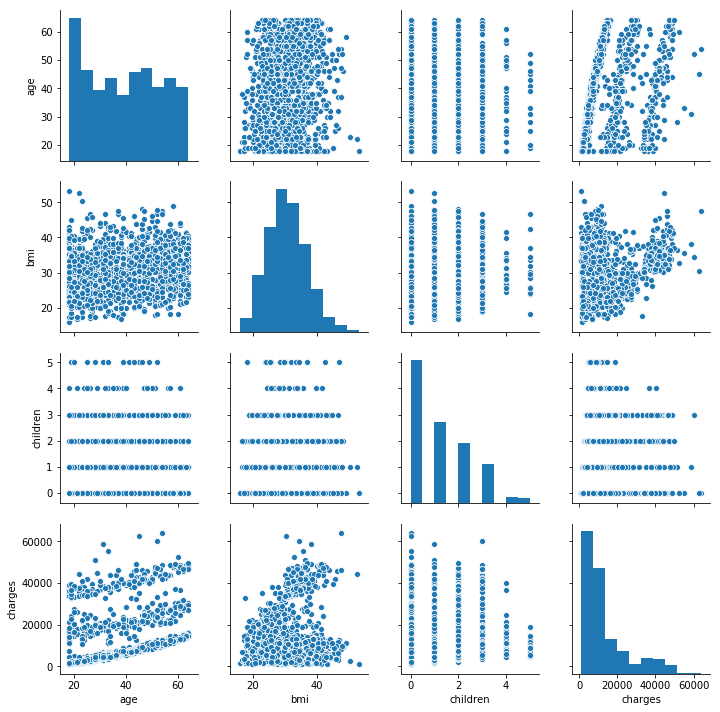

In [18]:
sns.pairplot(df)

### a. Do charges of people who smoke differ significantly  from the people who don't?

In [19]:
## Checking with the internal scipy function
t2, p2 = stats.ttest_ind(df[df.smoker=='yes'].charges,df[df.smoker=='no'].charges)
print("t = " + str(t2))
print("p = " + str(p2))
if p2<0.05:
    print("Reject Null")
else:
    print('Fail to reject null')

t = 46.664921172723716
p = 8.271435842177219e-283
Reject Null


Text(0.5, 1.0, 'Smokers Vs Charges')

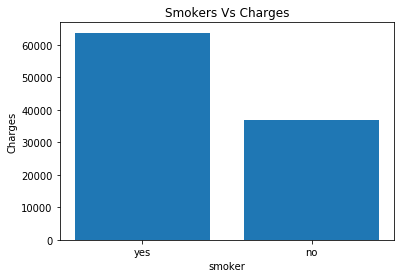

In [20]:
plt.bar(df['smoker'],df.charges)
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title("Smokers Vs Charges")

### b. Does bmi of males differ significantly from that of  females?

In [21]:
df_female=df[df.sex =='female']
df_male=df[df.sex=='male']

In [22]:
t2, p2 = stats.ttest_ind(df_female.bmi,df_male.bmi)
print("t = " + str(t2))
print("p = " + str(p2))
if p2<0.05:
    print("Reject Null")
else:
    print('Fail to reject null')

t = -1.696752635752224
p = 0.08997637178984932
Fail to reject null


Text(0.5, 1.0, 'BMI Vs Gender')

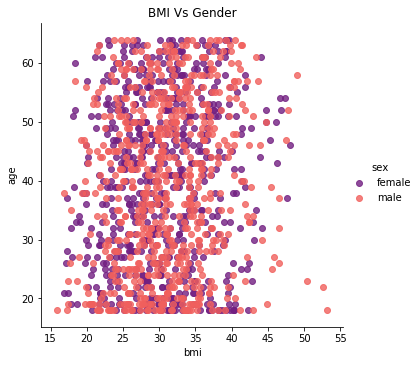

In [23]:
sns.lmplot(x="bmi",y="age",hue="sex",data=df,fit_reg=False,palette="magma")
plt.title("BMI Vs Gender")

### c. Is the proportion of smokers significantly different  in different genders?

In [24]:
from scipy.stats import chisquare,chi2_contingency,chi2

In [25]:
cont=pd.crosstab(df.sex,df.smoker)
stat, p, dof, expected=chi2_contingency(cont)
print("===Chi2 Stat===")
print(stat)
print("===Degrees of Freedom===")
print(dof)
print("===P-Value===")
print(p)
print("===Contingency Table===")
print(expected)

if p>0.05:
    print('Fail to reject null hypothesis')
else:
    print('Reject the null hypothesis')

===Chi2 Stat===
7.39291081459996
===Degrees of Freedom===
1
===P-Value===
0.006548143503580696
===Contingency Table===
[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
Reject the null hypothesis


Text(0.5, 1.0, 'Smokers Vs Gender')

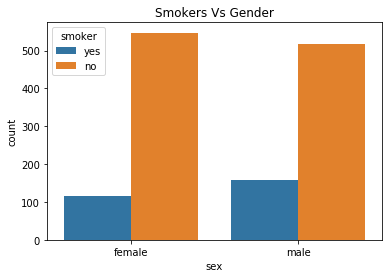

In [26]:
sns.countplot(df.sex,data=df,hue='smoker')
plt.title("Smokers Vs Gender")

### d. Is the distribution of bmi across women with no  children, one child and two children, the same ? 

In [27]:
child_0=df[df['children']==0]
child_1=df[df['children']==1]
child_2=df[df['children']==2]

In [28]:
from scipy.stats import levene, shapiro, f_oneway

# Levene's Test
levene(child_0.bmi,child_1.bmi,child_2.bmi)

LeveneResult(statistic=1.1137988954318256, pvalue=0.3286679430229422)

As p value is higher than 0.05, we fail to reject null Hypothesis which means that the columns pass equality of variance test. So, we can perform ANOVA test.

In [29]:
f, p = f_oneway(child_0.bmi,child_1.bmi,child_2.bmi)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

if p < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject null hypothesis')

One-way ANOVA
F value: 0.4169829280345703
P value: 0.6591330886467935 

Fail to reject null hypothesis


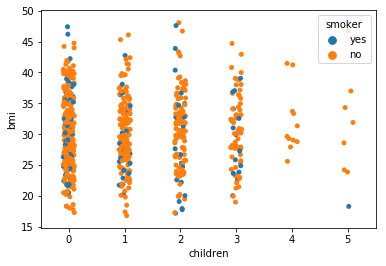

In [30]:
df_female=df[df.sex =='female']
sns.stripplot(df_female.children,df_female.bmi,data=df_female,hue='smoker')